In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor-mri-dataset


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 107.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]


=== Epoch 1/5 ===
Train - Loss: 0.2755, Accuracy: 0.9033, Precision: 0.9035, Recall: 0.9033, F1: 0.9033
Val   - Loss: 0.1963, Accuracy: 0.9361, Precision: 0.9479, Recall: 0.9361, F1: 0.9379, ROC-AUC: 0.9970

=== Epoch 2/5 ===
Train - Loss: 0.1032, Accuracy: 0.9661, Precision: 0.9661, Recall: 0.9661, F1: 0.9661
Val   - Loss: 0.1028, Accuracy: 0.9624, Precision: 0.9653, Recall: 0.9624, F1: 0.9626, ROC-AUC: 0.9987

=== Epoch 3/5 ===
Train - Loss: 0.0628, Accuracy: 0.9788, Precision: 0.9788, Recall: 0.9788, F1: 0.9788
Val   - Loss: 0.0702, Accuracy: 0.9773, Precision: 0.9781, Recall: 0.9773, F1: 0.9773, ROC-AUC: 0.9990

=== Epoch 4/5 ===
Train - Loss: 0.0510, Accuracy: 0.9840, Precision: 0.9840, Recall: 0.9840, F1: 0.9840
Val   - Loss: 0.0821, Accuracy: 0.9720, Precision: 0.9727, Recall: 0.9720, F1: 0.9721, ROC-AUC: 0.9984

=== Epoch 5/5 ===
Train - Loss: 0.0385, Accuracy: 0.9897, Precision: 0.9897, Recall: 0.9897, F1: 0.9897
Val   - Loss: 0.0689, Accuracy: 0.9851, Precision: 0.9854, Reca

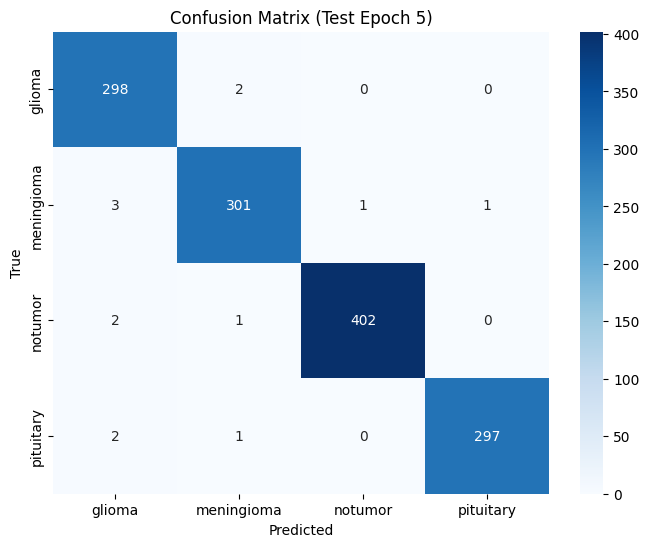

Test  - Loss: 0.0335, Accuracy: 0.9901, Precision: 0.9902, Recall: 0.9901, F1: 0.9901, ROC-AUC: 0.9997
Per-Class Metrics (Test):
glioma - Precision: 0.9770, Recall: 0.9933, F1: 0.9851
meningioma - Precision: 0.9869, Recall: 0.9837, F1: 0.9853
notumor - Precision: 0.9975, Recall: 0.9926, F1: 0.9950
pituitary - Precision: 0.9966, Recall: 0.9900, F1: 0.9933

==================== Final Test Evaluation ====================


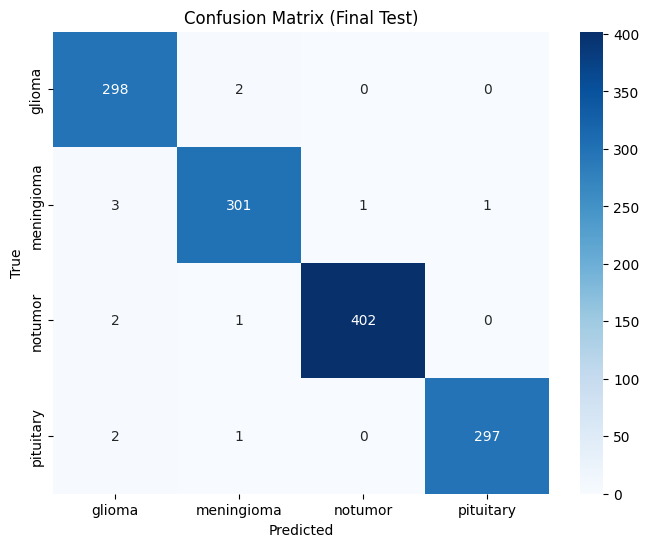

Test Metrics - Loss: 0.0335, Accuracy: 0.9901, Precision: 0.9902, Recall: 0.9901, F1: 0.9901, ROC-AUC: 0.9997

Per-Class Metrics (Test):
glioma - Precision: 0.9770, Recall: 0.9933, F1: 0.9851
meningioma - Precision: 0.9869, Recall: 0.9837, F1: 0.9853
notumor - Precision: 0.9975, Recall: 0.9926, F1: 0.9950
pituitary - Precision: 0.9966, Recall: 0.9900, F1: 0.9933


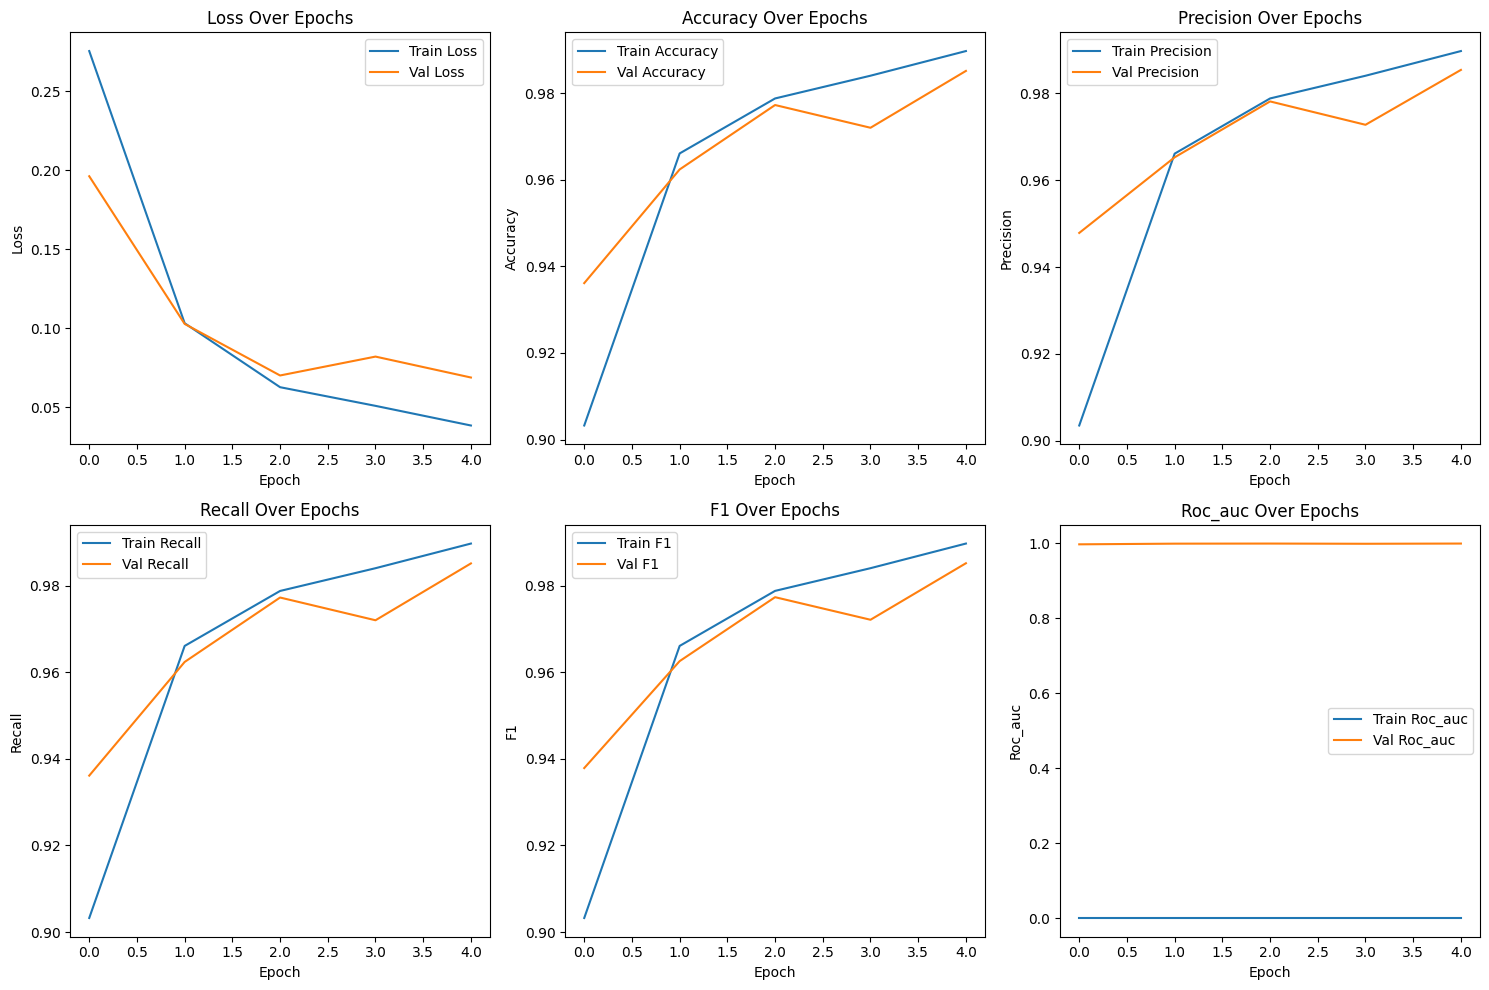

In [ ]:
# Install required packages
!pip install -U scikit-learn  # Update scikit-learn
!pip install timm  # Install timm for Swin Transformer

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision import datasets, transforms
import timm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Create /kaggle/working directory if it doesn't exist
os.makedirs("/kaggle/working", exist_ok=True)

# Set seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define paths
data_dir = "/kaggle/input/brain-tumor-mri-dataset"
train_dir = os.path.join(data_dir, "Training")
test_dir = os.path.join(data_dir, "Testing")

# Data transformations
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),  # Handle grayscale
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transform)

# Split training data into train and validation
indices = list(range(len(train_dataset)))
train_idx, val_idx = train_test_split(indices, test_size=0.2, stratify=[train_dataset.targets[i] for i in indices], random_state=42)

train_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(val_idx)

train_loader = DataLoader(train_dataset, batch_size=32, sampler=train_sampler, num_workers=2)
val_loader = DataLoader(train_dataset, batch_size=32, sampler=val_sampler, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Get number of classes
num_classes = len(train_dataset.classes)
class_names = train_dataset.classes
print(f"Number of classes: {num_classes}, Classes: {class_names}")

# Compute class weights for imbalanced dataset
class_counts = Counter([train_dataset.targets[i] for i in train_idx])
total_samples = sum(class_counts.values())
class_weights = torch.tensor([total_samples / (num_classes * class_counts[i]) for i in range(num_classes)], dtype=torch.float).to(device)
print(f"Class weights: {class_weights}")

# Initialize Swin Transformer model
model = timm.create_model("swin_tiny_patch4_window7_224", pretrained=True, num_classes=num_classes)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

# Function to compute metrics
def compute_metrics(model, loader, is_test=False, phase="Evaluation"):
    model.eval()
    all_preds, all_labels, losses, all_probs = [], [], [], []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            losses.append(loss.item())
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            probs = torch.softmax(outputs, dim=1)
            all_probs.extend(probs.cpu().numpy())

    # Core metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
    avg_loss = np.mean(losses)

    # Per-class metrics
    per_class_precision = precision_score(all_labels, all_preds, average=None, zero_division=0)
    per_class_recall = recall_score(all_labels, all_preds, average=None, zero_division=0)
    per_class_f1 = f1_score(all_labels, all_preds, average=None, zero_division=0)

    # ROC-AUC (one-vs-rest, weighted)
    try:
        all_probs = np.array(all_probs)
        all_labels_one_hot = np.zeros((len(all_labels), num_classes))
        for i, label in enumerate(all_labels):
            all_labels_one_hot[i, label] = 1
        roc_auc = roc_auc_score(all_labels_one_hot, all_probs, average='weighted', multi_class='ovr')
    except:
        roc_auc = 0.0  # Fallback if ROC-AUC fails

    # Confusion matrix (for test set or on demand)
    if is_test:
        cm = confusion_matrix(all_labels, all_preds)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.title(f"Confusion Matrix ({phase})")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.savefig(f"/kaggle/working/confusion_matrix_{phase.lower().replace(' ', '_')}.png")
        plt.show()

    return (accuracy, precision, recall, f1, avg_loss, roc_auc,
            per_class_precision, per_class_recall, per_class_f1)

# Training loop with mid-training test evaluation
num_epochs = 5  # Changed to 5 epochs
train_metrics = {'loss': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
val_metrics = {'loss': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
best_recall = 0.0
best_model_path = "/kaggle/working/swin_transformer_best.pth"

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    all_preds, all_labels = [], []
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    train_loss = running_loss / len(train_loader)
    train_accuracy = accuracy_score(all_labels, all_preds)
    train_precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    train_recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    train_f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    train_metrics['loss'].append(train_loss)
    train_metrics['accuracy'].append(train_accuracy)
    train_metrics['precision'].append(train_precision)
    train_metrics['recall'].append(train_recall)
    train_metrics['f1'].append(train_f1)
    train_metrics['roc_auc'].append(0.0)  # ROC-AUC computed only for val/test

    # Validation
    (val_accuracy, val_precision, val_recall, val_f1, val_loss, val_roc_auc,
     _, _, _) = compute_metrics(model, val_loader, phase="Validation")
    val_metrics['loss'].append(val_loss)
    val_metrics['accuracy'].append(val_accuracy)
    val_metrics['precision'].append(val_precision)
    val_metrics['recall'].append(val_recall)
    val_metrics['f1'].append(val_f1)
    val_metrics['roc_auc'].append(val_roc_auc)

    # Save best model based on validation recall
    if val_recall > best_recall:
        best_recall = val_recall
        torch.save(model.state_dict(), best_model_path)

    # Step scheduler
    scheduler.step(val_loss)

    print(f"\n=== Epoch {epoch+1}/{num_epochs} ===")
    print(f"Train - Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
    print(f"Val   - Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}, ROC-AUC: {val_roc_auc:.4f}")

    # Mid-training test evaluation (at epoch 5)
    if (epoch + 1) % 5 == 0:
        print(f"\n--- Mid-Training Test Evaluation (Epoch {epoch+1}) ---")
        (test_accuracy, test_precision, test_recall, test_f1, test_loss, test_roc_auc,
         test_per_class_precision, test_per_class_recall, test_per_class_f1) = compute_metrics(model, test_loader, is_test=True, phase=f"Test Epoch {epoch+1}")
        print(f"Test  - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}, ROC-AUC: {test_roc_auc:.4f}")
        print("Per-Class Metrics (Test):")
        for i, class_name in enumerate(class_names):
            print(f"{class_name} - Precision: {test_per_class_precision[i]:.4f}, Recall: {test_per_class_recall[i]:.4f}, F1: {test_per_class_f1[i]:.4f}")

# Final evaluation phase on test set
print("\n==================== Final Test Evaluation ====================")
model.load_state_dict(torch.load(best_model_path))
(test_accuracy, test_precision, test_recall, test_f1, test_loss, test_roc_auc,
 test_per_class_precision, test_per_class_recall, test_per_class_f1) = compute_metrics(model, test_loader, is_test=True, phase="Final Test")

# Print final test metrics
print(f"Test Metrics - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}, ROC-AUC: {test_roc_auc:.4f}")
print("\nPer-Class Metrics (Test):")
for i, class_name in enumerate(class_names):
    print(f"{class_name} - Precision: {test_per_class_precision[i]:.4f}, Recall: {test_per_class_recall[i]:.4f}, F1: {test_per_class_f1[i]:.4f}")

# Plot metrics
plt.figure(figsize=(15, 10))
metrics = ['loss', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.plot(train_metrics[metric], label=f"Train {metric.capitalize()}")
    plt.plot(val_metrics[metric], label=f"Val {metric.capitalize()}")
    plt.xlabel("Epoch")
    plt.ylabel(metric.capitalize())
    plt.title(f"{metric.capitalize()} Over Epochs")
    plt.legend()
plt.tight_layout()
plt.savefig("/kaggle/working/training_metrics.png")
plt.show()

# Save final model
torch.save(model.state_dict(), "/kaggle/working/swin_transformer_final.pth")

Number of classes: 4, Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Class weights: tensor([1.0807, 1.0665, 0.8952, 0.9805])

=== Epoch 1/10 ===
Train - Loss: 0.8611, Accuracy: 0.6141, Precision: 0.6200, Recall: 0.6141, F1: 0.6144
Val   - Loss: 0.9290, Accuracy: 0.5853, Precision: 0.6916, Recall: 0.5853, F1: 0.5785, ROC-AUC: 0.8961

=== Epoch 2/10 ===
Train - Loss: 0.6435, Accuracy: 0.7339, Precision: 0.7325, Recall: 0.7339, F1: 0.7331
Val   - Loss: 1.2365, Accuracy: 0.5092, Precision: 0.6566, Recall: 0.5092, F1: 0.4769, ROC-AUC: 0.8636

=== Epoch 3/10 ===
Train - Loss: 0.5811, Accuracy: 0.7586, Precision: 0.7581, Recall: 0.7586, F1: 0.7580
Val   - Loss: 1.3218, Accuracy: 0.5652, Precision: 0.7092, Recall: 0.5652, F1: 0.5250, ROC-AUC: 0.8756

=== Epoch 4/10 ===
Train - Loss: 0.4998, Accuracy: 0.8083, Precision: 0.8084, Recall: 0.8083, F1: 0.8078
Val   - Loss: 0.9737, Accuracy: 0.6772, Precision: 0.7571, Recall: 0.6772, F1: 0.6770, ROC-AUC: 0.9185

=== Epoch 5/10 ===
Train - 

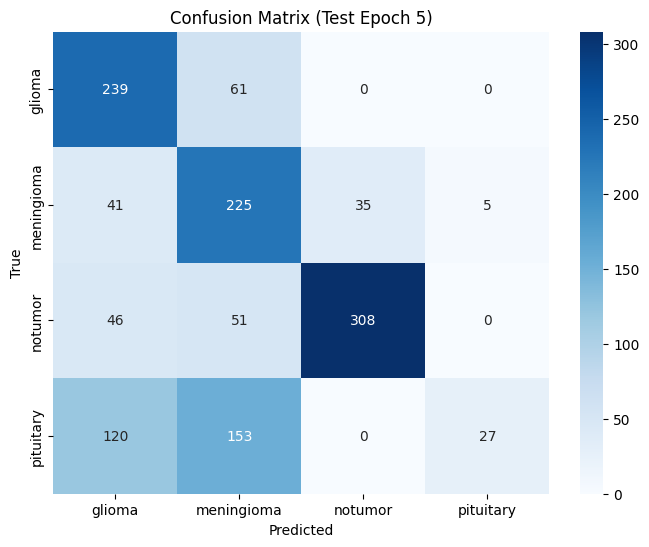

Test  - Loss: 1.3020, Accuracy: 0.6095, Precision: 0.7003, Recall: 0.6095, F1: 0.5702, ROC-AUC: 0.8988
Per-Class Metrics (Test):
glioma - Precision: 0.5359, Recall: 0.7967, F1: 0.6408
meningioma - Precision: 0.4592, Recall: 0.7353, F1: 0.5653
notumor - Precision: 0.8980, Recall: 0.7605, F1: 0.8235
pituitary - Precision: 0.8438, Recall: 0.0900, F1: 0.1627

=== Epoch 6/10 ===
Train - Loss: 0.4084, Accuracy: 0.8501, Precision: 0.8520, Recall: 0.8501, F1: 0.8502
Val   - Loss: 0.8954, Accuracy: 0.6632, Precision: 0.8050, Recall: 0.6632, F1: 0.6644, ROC-AUC: 0.9398

=== Epoch 7/10 ===
Train - Loss: 0.3906, Accuracy: 0.8571, Precision: 0.8585, Recall: 0.8571, F1: 0.8571
Val   - Loss: 0.9849, Accuracy: 0.6597, Precision: 0.7939, Recall: 0.6597, F1: 0.6516, ROC-AUC: 0.9354

=== Epoch 8/10 ===
Train - Loss: 0.3958, Accuracy: 0.8470, Precision: 0.8492, Recall: 0.8470, F1: 0.8469
Val   - Loss: 0.9750, Accuracy: 0.6597, Precision: 0.8042, Recall: 0.6597, F1: 0.6488, ROC-AUC: 0.9368

=== Epoch 9/10 

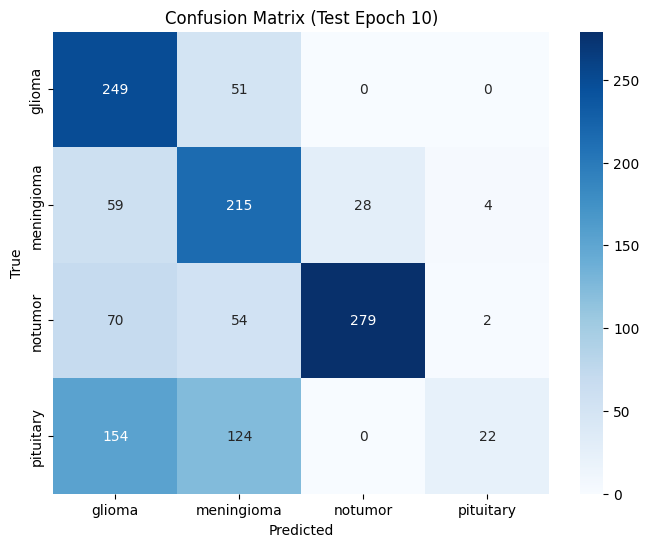

Test  - Loss: 1.5110, Accuracy: 0.5835, Precision: 0.6807, Recall: 0.5835, F1: 0.5436, ROC-AUC: 0.8888
Per-Class Metrics (Test):
glioma - Precision: 0.4680, Recall: 0.8300, F1: 0.5986
meningioma - Precision: 0.4842, Recall: 0.7026, F1: 0.5733
notumor - Precision: 0.9088, Recall: 0.6889, F1: 0.7837
pituitary - Precision: 0.7857, Recall: 0.0733, F1: 0.1341

==================== Final Test Evaluation ====================


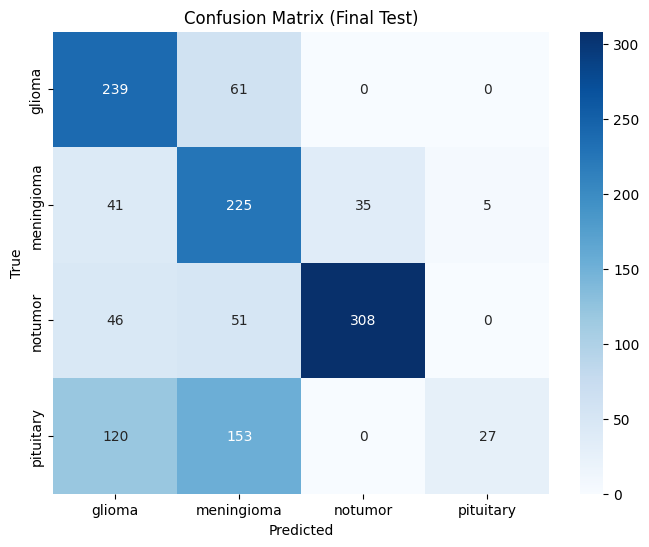

Test Metrics - Loss: 1.3020, Accuracy: 0.6095, Precision: 0.7003, Recall: 0.6095, F1: 0.5702, ROC-AUC: 0.8988

Per-Class Metrics (Test):
glioma - Precision: 0.5359, Recall: 0.7967, F1: 0.6408
meningioma - Precision: 0.4592, Recall: 0.7353, F1: 0.5653
notumor - Precision: 0.8980, Recall: 0.7605, F1: 0.8235
pituitary - Precision: 0.8438, Recall: 0.0900, F1: 0.1627


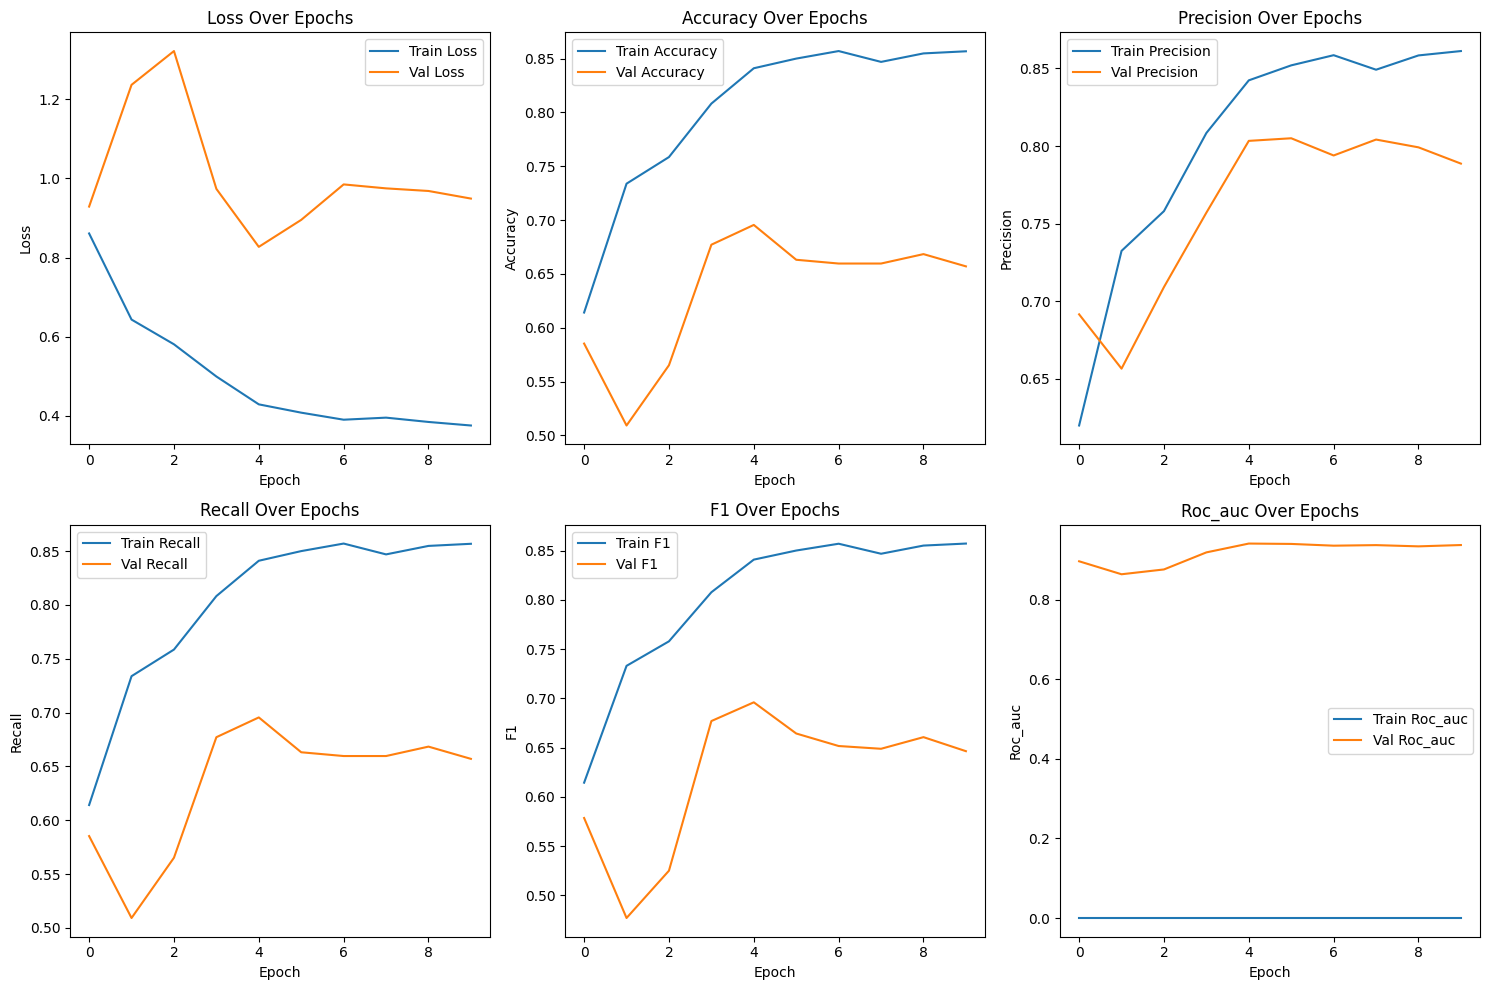

In [ ]:
# Install required packages
!pip install -U scikit-learn  # Update scikit-learn

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, SubsetRandomSampler, WeightedRandomSampler
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Create /kaggle/working directory if it doesn't exist
os.makedirs("/kaggle/working", exist_ok=True)

# Set seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define paths
data_dir = "/kaggle/input/brain-tumor-mri-dataset"
train_dir = os.path.join(data_dir, "Training")
test_dir = os.path.join(data_dir, "Testing")

# Data transformations with enhanced augmentations
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),  # Handle grayscale
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transform)

# Split training data into train and validation
indices = list(range(len(train_dataset)))
train_idx, val_idx = train_test_split(indices, test_size=0.2, stratify=[train_dataset.targets[i] for i in indices], random_state=42)

# WeightedRandomSampler for training to handle class imbalance
class_counts = Counter([train_dataset.targets[i] for i in train_idx])
total_samples = sum(class_counts.values())
class_weights = torch.tensor([total_samples / (len(class_counts) * class_counts[i]) for i in range(len(class_counts))], dtype=torch.float)
weights = [class_weights[train_dataset.targets[i]] for i in train_idx]
train_sampler = WeightedRandomSampler(weights, len(weights))

val_sampler = SubsetRandomSampler(val_idx)

train_loader = DataLoader(train_dataset, batch_size=32, sampler=train_sampler, num_workers=2)
val_loader = DataLoader(train_dataset, batch_size=32, sampler=val_sampler, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Get number of classes
num_classes = len(train_dataset.classes)
class_names = train_dataset.classes
print(f"Number of classes: {num_classes}, Classes: {class_names}")
print(f"Class weights: {class_weights}")

# Define pure CNN model
class PureCNN(nn.Module):
    def __init__(self, num_classes):
        super(PureCNN, self).__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 7 * 7, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = self.classifier(x)
        return x

# Initialize CNN model
model = PureCNN(num_classes=num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=0.05)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)

# Function to compute metrics with threshold tuning
def compute_metrics(model, loader, is_test=False, phase="Evaluation", recall_threshold=0.3):
    model.eval()
    all_preds, all_labels, losses, all_probs = [], [], [], []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            losses.append(loss.item())
            probs = torch.softmax(outputs, dim=1)
            # Threshold tuning for higher recall
            preds = torch.argmax(probs, dim=1)
            for i in range(len(probs)):
                if torch.max(probs[i, 1:]) > recall_threshold:
                    preds[i] = torch.argmax(probs[i, 1:]) + 1
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    # Core metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
    avg_loss = np.mean(losses)

    # Per-class metrics
    per_class_precision = precision_score(all_labels, all_preds, average=None, zero_division=0)
    per_class_recall = recall_score(all_labels, all_preds, average=None, zero_division=0)
    per_class_f1 = f1_score(all_labels, all_preds, average=None, zero_division=0)

    # ROC-AUC
    try:
        all_probs = np.array(all_probs)
        all_labels_one_hot = np.zeros((len(all_labels), num_classes))
        for i, label in enumerate(all_labels):
            all_labels_one_hot[i, label] = 1
        roc_auc = roc_auc_score(all_labels_one_hot, all_probs, average='weighted', multi_class='ovr')
    except:
        roc_auc = 0.0

    # Confusion matrix
    if is_test:
        cm = confusion_matrix(all_labels, all_preds)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.title(f"Confusion Matrix ({phase})")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.savefig(f"/kaggle/working/confusion_matrix_{phase.lower().replace(' ', '_')}.png")
        plt.show()

    return (accuracy, precision, recall, f1, avg_loss, roc_auc,
            per_class_precision, per_class_recall, per_class_f1)

# Training loop with early stopping
num_epochs = 10  # Increased to 10 epochs
train_metrics = {'loss': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
val_metrics = {'loss': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
best_recall = 0.0
best_val_loss = float('inf')
patience = 3
early_stop_counter = 0
best_model_path = "/kaggle/working/cnn_best.pth"

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    all_preds, all_labels = [], []
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    train_loss = running_loss / len(train_loader)
    train_accuracy = accuracy_score(all_labels, all_preds)
    train_precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    train_recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    train_f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    train_metrics['loss'].append(train_loss)
    train_metrics['accuracy'].append(train_accuracy)
    train_metrics['precision'].append(train_precision)
    train_metrics['recall'].append(train_recall)
    train_metrics['f1'].append(train_f1)
    train_metrics['roc_auc'].append(0.0)

    # Validation
    (val_accuracy, val_precision, val_recall, val_f1, val_loss, val_roc_auc,
     _, _, _) = compute_metrics(model, val_loader, phase="Validation")
    val_metrics['loss'].append(val_loss)
    val_metrics['accuracy'].append(val_accuracy)
    val_metrics['precision'].append(val_precision)
    val_metrics['recall'].append(val_recall)
    val_metrics['f1'].append(val_f1)
    val_metrics['roc_auc'].append(val_roc_auc)

    # Save best model based on validation recall
    if val_recall > best_recall:
        best_recall = val_recall
        torch.save(model.state_dict(), best_model_path)

    # Step scheduler
    scheduler.step(val_loss)

    print(f"\n=== Epoch {epoch+1}/{num_epochs} ===")
    print(f"Train - Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
    print(f"Val   - Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}, ROC-AUC: {val_roc_auc:.4f}")

    # Mid-training test evaluation (at epochs 5 and 10)
    if (epoch + 1) % 5 == 0:
        print(f"\n--- Mid-Training Test Evaluation (Epoch {epoch+1}) ---")
        (test_accuracy, test_precision, test_recall, test_f1, test_loss, test_roc_auc,
         test_per_class_precision, test_per_class_recall, test_per_class_f1) = compute_metrics(model, test_loader, is_test=True, phase=f"Test Epoch {epoch+1}")
        print(f"Test  - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}, ROC-AUC: {test_roc_auc:.4f}")
        print("Per-Class Metrics (Test):")
        for i, class_name in enumerate(class_names):
            print(f"{class_name} - Precision: {test_per_class_precision[i]:.4f}, Recall: {test_per_class_recall[i]:.4f}, F1: {test_per_class_f1[i]:.4f}")

# Final evaluation phase on test set
print("\n==================== Final Test Evaluation ====================")
model.load_state_dict(torch.load(best_model_path))
(test_accuracy, test_precision, test_recall, test_f1, test_loss, test_roc_auc,
 test_per_class_precision, test_per_class_recall, test_per_class_f1) = compute_metrics(model, test_loader, is_test=True, phase="Final Test")

# Print final test metrics
print(f"Test Metrics - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}, ROC-AUC: {test_roc_auc:.4f}")
print("\nPer-Class Metrics (Test):")
for i, class_name in enumerate(class_names):
    print(f"{class_name} - Precision: {test_per_class_precision[i]:.4f}, Recall: {test_per_class_recall[i]:.4f}, F1: {test_per_class_f1[i]:.4f}")

# Plot metrics
plt.figure(figsize=(15, 10))
metrics = ['loss', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.plot(train_metrics[metric], label=f"Train {metric.capitalize()}")
    plt.plot(val_metrics[metric], label=f"Val {metric.capitalize()}")
    plt.xlabel("Epoch")
    plt.ylabel(metric.capitalize())
    plt.title(f"{metric.capitalize()} Over Epochs")
    plt.legend()
plt.tight_layout()
plt.savefig("/kaggle/working/training_metrics.png")
plt.show()

# Save final model
torch.save(model.state_dict(), "/kaggle/working/cnn_final.pth")

Number of classes: 4, Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Class weights: tensor([70.2674, 69.8066, 63.9537, 66.9311])

=== Epoch 1/10 ===
Train - Loss: 1.0301, Accuracy: 0.5351, Precision: 0.5324, Recall: 0.5351, F1: 0.5234
Val   - Loss: 1.4737, Accuracy: 0.2686, Precision: 0.3802, Recall: 0.2686, F1: 0.1540, ROC-AUC: 0.7623

=== Epoch 2/10 ===
Train - Loss: 0.8694, Accuracy: 0.6122, Precision: 0.6093, Recall: 0.6122, F1: 0.6055
Val   - Loss: 1.1944, Accuracy: 0.3071, Precision: 0.5089, Recall: 0.3071, F1: 0.2182, ROC-AUC: 0.8394

=== Epoch 3/10 ===
Train - Loss: 0.7726, Accuracy: 0.6632, Precision: 0.6622, Recall: 0.6632, F1: 0.6607
Val   - Loss: 1.0651, Accuracy: 0.4269, Precision: 0.5439, Recall: 0.4269, F1: 0.3637, ROC-AUC: 0.8660

=== Epoch 4/10 ===
Train - Loss: 0.7420, Accuracy: 0.6967, Precision: 0.6924, Recall: 0.6967, F1: 0.6932
Val   - Loss: 0.9661, Accuracy: 0.5031, Precision: 0.7428, Recall: 0.5031, F1: 0.4737, ROC-AUC: 0.8834

=== Epoch 5/10 ===
Trai

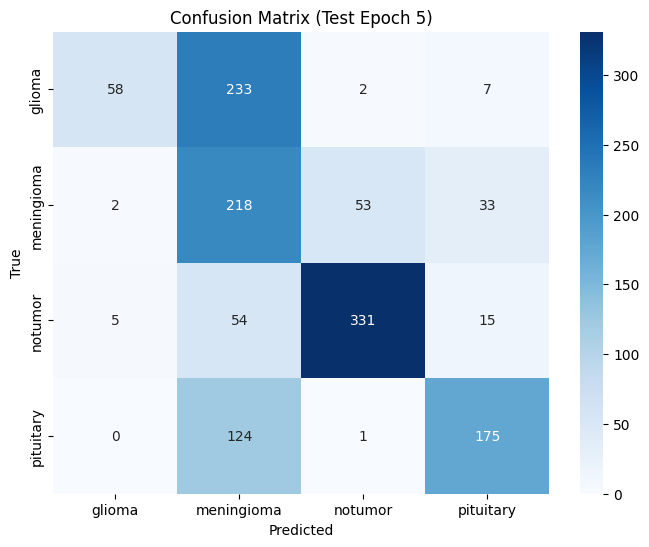

Test  - Loss: 0.8251, Accuracy: 0.5965, Precision: 0.7234, Recall: 0.5965, F1: 0.5909, ROC-AUC: 0.8970
Per-Class Metrics (Test):
glioma - Precision: 0.8923, Recall: 0.1933, F1: 0.3178
meningioma - Precision: 0.3466, Recall: 0.7124, F1: 0.4663
notumor - Precision: 0.8553, Recall: 0.8173, F1: 0.8359
pituitary - Precision: 0.7609, Recall: 0.5833, F1: 0.6604

=== Epoch 6/10 ===
Train - Loss: 0.6616, Accuracy: 0.7166, Precision: 0.7120, Recall: 0.7166, F1: 0.7138
Val   - Loss: 1.1002, Accuracy: 0.4094, Precision: 0.7726, Recall: 0.4094, F1: 0.3492, ROC-AUC: 0.9040

=== Epoch 7/10 ===
Train - Loss: 0.6378, Accuracy: 0.7273, Precision: 0.7246, Recall: 0.7273, F1: 0.7256
Val   - Loss: 0.8364, Accuracy: 0.5398, Precision: 0.7686, Recall: 0.5398, F1: 0.5049, ROC-AUC: 0.9291

=== Epoch 8/10 ===
Train - Loss: 0.6055, Accuracy: 0.7472, Precision: 0.7440, Recall: 0.7472, F1: 0.7453
Val   - Loss: 0.7657, Accuracy: 0.5888, Precision: 0.7977, Recall: 0.5888, F1: 0.5616, ROC-AUC: 0.9299

=== Epoch 9/10 

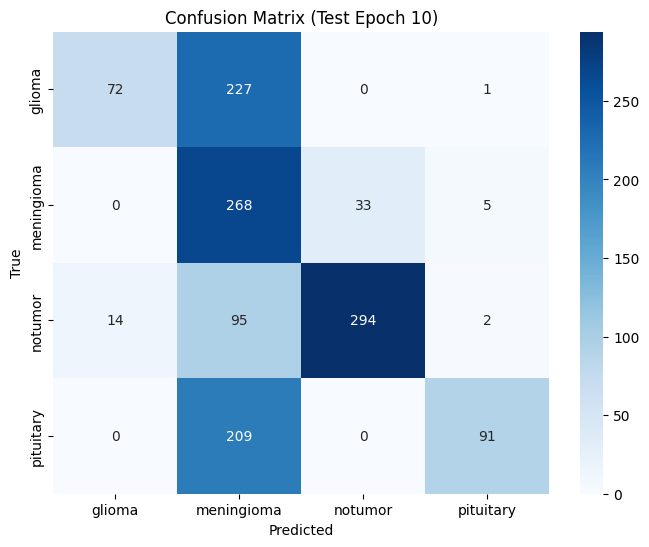

Test  - Loss: 1.0289, Accuracy: 0.5530, Precision: 0.7580, Recall: 0.5530, F1: 0.5511, ROC-AUC: 0.9107
Per-Class Metrics (Test):
glioma - Precision: 0.8372, Recall: 0.2400, F1: 0.3731
meningioma - Precision: 0.3354, Recall: 0.8758, F1: 0.4851
notumor - Precision: 0.8991, Recall: 0.7259, F1: 0.8033
pituitary - Precision: 0.9192, Recall: 0.3033, F1: 0.4561

==================== Final Test Evaluation ====================


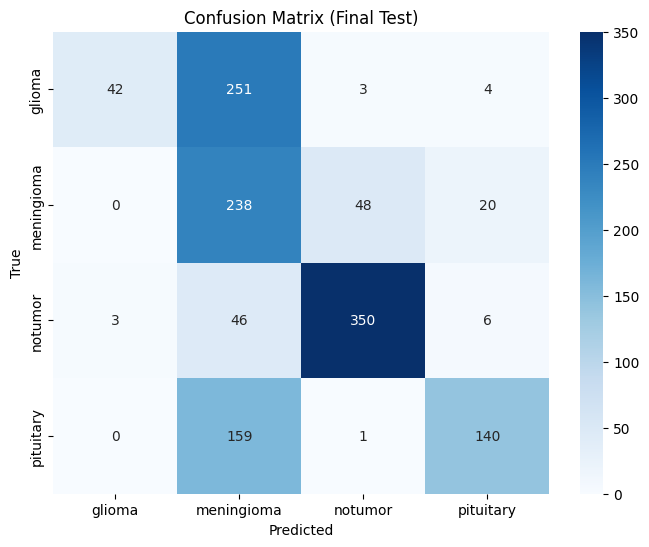

Test Metrics - Loss: 0.8057, Accuracy: 0.5873, Precision: 0.7510, Recall: 0.5873, F1: 0.5711, ROC-AUC: 0.9092

Per-Class Metrics (Test):
glioma - Precision: 0.9333, Recall: 0.1400, F1: 0.2435
meningioma - Precision: 0.3429, Recall: 0.7778, F1: 0.4760
notumor - Precision: 0.8706, Recall: 0.8642, F1: 0.8674
pituitary - Precision: 0.8235, Recall: 0.4667, F1: 0.5957


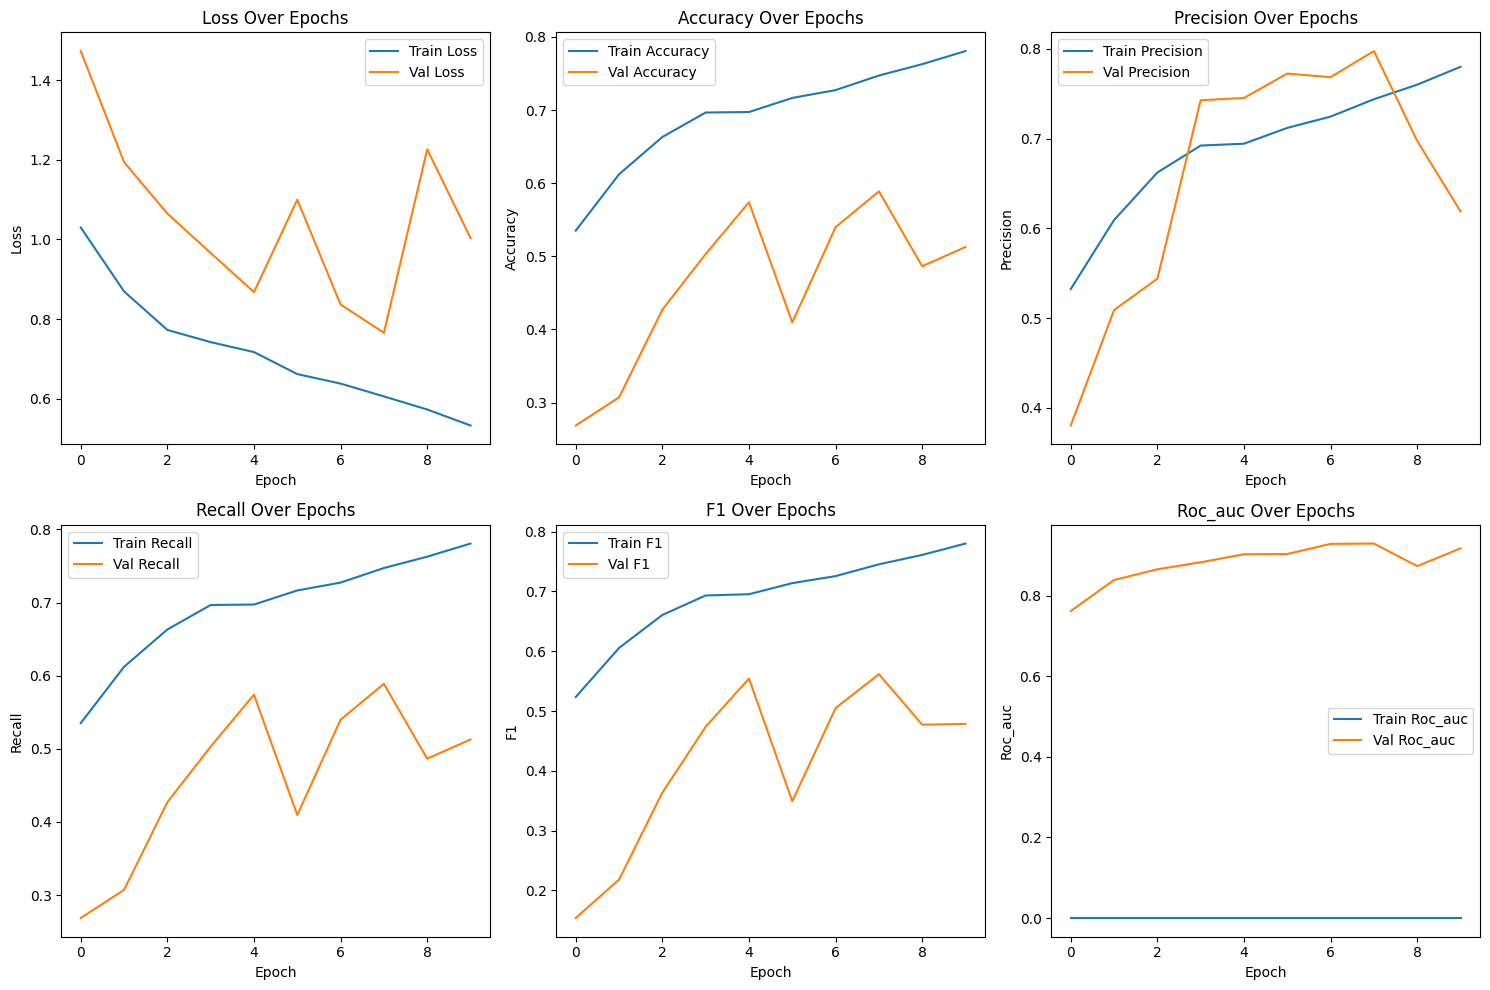

In [ ]:
# Install required packages
!pip install -U scikit-learn  # Update scikit-learn

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, SubsetRandomSampler, WeightedRandomSampler
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Create /kaggle/working directory if it doesn't exist
os.makedirs("/kaggle/working", exist_ok=True)

# Set seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define paths
data_dir = "/kaggle/input/brain-tumor-mri-dataset"
train_dir = os.path.join(data_dir, "Training")
test_dir = os.path.join(data_dir, "Testing")

# Data transformations with stronger augmentations
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),  # Increased range
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),  # Handle grayscale
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transform)

# Split training data into train and validation
indices = list(range(len(train_dataset)))
train_idx, val_idx = train_test_split(indices, test_size=0.2, stratify=[train_dataset.targets[i] for i in indices], random_state=42)

# WeightedRandomSampler with stronger weights for minority classes
class_counts = Counter([train_dataset.targets[i] for i in train_idx])
total_samples = sum(class_counts.values())
class_weights = torch.tensor([total_samples / (len(class_counts) * class_counts[i]) ** 0.5 for i in range(len(class_counts))], dtype=torch.float)  # Square root for stronger weighting
weights = [class_weights[train_dataset.targets[i]] for i in train_idx]
train_sampler = WeightedRandomSampler(weights, len(weights))

val_sampler = SubsetRandomSampler(val_idx)

train_loader = DataLoader(train_dataset, batch_size=32, sampler=train_sampler, num_workers=2)
val_loader = DataLoader(train_dataset, batch_size=32, sampler=val_sampler, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Get number of classes
num_classes = len(train_dataset.classes)
class_names = train_dataset.classes
print(f"Number of classes: {num_classes}, Classes: {class_names}")
print(f"Class weights: {class_weights}")

# Define enhanced pure CNN model with residual connections
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = nn.ReLU(inplace=True)(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = nn.ReLU(inplace=True)(out)
        return out

class PureCNN(nn.Module):
    def __init__(self, num_classes):
        super(PureCNN, self).__init__()
        self.features = nn.Sequential(
            # Block 1
            ResidualBlock(3, 64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3),

            # Block 2
            ResidualBlock(64, 128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3),

            # Block 3
            ResidualBlock(128, 256),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3),

            # Block 4
            ResidualBlock(256, 512),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 7 * 7, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = self.classifier(x)
        return x

# Initialize CNN model
model = PureCNN(num_classes=num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=0.05)
scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-3, step_size_up=200, mode='triangular')

# Function to compute metrics with aggressive threshold tuning
def compute_metrics(model, loader, is_test=False, phase="Evaluation", recall_threshold=0.2):
    model.eval()
    all_preds, all_labels, losses, all_probs = [], [], [], []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            losses.append(loss.item())
            probs = torch.softmax(outputs, dim=1)
            # Aggressive threshold tuning for higher recall
            preds = torch.argmax(probs, dim=1)
            for i in range(len(probs)):
                if torch.max(probs[i, 1:]) > recall_threshold:
                    preds[i] = torch.argmax(probs[i, 1:]) + 1
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    # Core metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
    avg_loss = np.mean(losses)

    # Per-class metrics
    per_class_precision = precision_score(all_labels, all_preds, average=None, zero_division=0)
    per_class_recall = recall_score(all_labels, all_preds, average=None, zero_division=0)
    per_class_f1 = f1_score(all_labels, all_preds, average=None, zero_division=0)

    # ROC-AUC
    try:
        all_probs = np.array(all_probs)
        all_labels_one_hot = np.zeros((len(all_labels), num_classes))
        for i, label in enumerate(all_labels):
            all_labels_one_hot[i, label] = 1
        roc_auc = roc_auc_score(all_labels_one_hot, all_probs, average='weighted', multi_class='ovr')
    except:
        roc_auc = 0.0

    # Confusion matrix
    if is_test:
        cm = confusion_matrix(all_labels, all_preds)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.title(f"Confusion Matrix ({phase})")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.savefig(f"/kaggle/working/confusion_matrix_{phase.lower().replace(' ', '_')}.png")
        plt.show()

    return (accuracy, precision, recall, f1, avg_loss, roc_auc,
            per_class_precision, per_class_recall, per_class_f1)

# Training loop with early stopping on recall
num_epochs = 10
train_metrics = {'loss': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
val_metrics = {'loss': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
best_recall = 0.0
patience = 3
early_stop_counter = 0
best_model_path = "/kaggle/working/cnn_best.pth"

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    all_preds, all_labels = [], []
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    train_loss = running_loss / len(train_loader)
    train_accuracy = accuracy_score(all_labels, all_preds)
    train_precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    train_recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    train_f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    train_metrics['loss'].append(train_loss)
    train_metrics['accuracy'].append(train_accuracy)
    train_metrics['precision'].append(train_precision)
    train_metrics['recall'].append(train_recall)
    train_metrics['f1'].append(train_f1)
    train_metrics['roc_auc'].append(0.0)

    # Validation
    (val_accuracy, val_precision, val_recall, val_f1, val_loss, val_roc_auc,
     _, _, _) = compute_metrics(model, val_loader, phase="Validation")
    val_metrics['loss'].append(val_loss)
    val_metrics['accuracy'].append(val_accuracy)
    val_metrics['precision'].append(val_precision)
    val_metrics['recall'].append(val_recall)
    val_metrics['f1'].append(val_f1)
    val_metrics['roc_auc'].append(val_roc_auc)

    # Save best model and early stopping based on validation recall
    if val_recall > best_recall:
        best_recall = val_recall
        torch.save(model.state_dict(), best_model_path)
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1} due to no improvement in validation recall")
            break

    # Step scheduler
    scheduler.step()

    print(f"\n=== Epoch {epoch+1}/{num_epochs} ===")
    print(f"Train - Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
    print(f"Val   - Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}, ROC-AUC: {val_roc_auc:.4f}")

    # Mid-training test evaluation (at epochs 5 and 10)
    if (epoch + 1) % 5 == 0:
        print(f"\n--- Mid-Training Test Evaluation (Epoch {epoch+1}) ---")
        (test_accuracy, test_precision, test_recall, test_f1, test_loss, test_roc_auc,
         test_per_class_precision, test_per_class_recall, test_per_class_f1) = compute_metrics(model, test_loader, is_test=True, phase=f"Test Epoch {epoch+1}")
        print(f"Test  - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}, ROC-AUC: {test_roc_auc:.4f}")
        print("Per-Class Metrics (Test):")
        for i, class_name in enumerate(class_names):
            print(f"{class_name} - Precision: {test_per_class_precision[i]:.4f}, Recall: {test_per_class_recall[i]:.4f}, F1: {test_per_class_f1[i]:.4f}")

# Final evaluation phase on test set
print("\n==================== Final Test Evaluation ====================")
model.load_state_dict(torch.load(best_model_path))
(test_accuracy, test_precision, test_recall, test_f1, test_loss, test_roc_auc,
 test_per_class_precision, test_per_class_recall, test_per_class_f1) = compute_metrics(model, test_loader, is_test=True, phase="Final Test")

# Print final test metrics
print(f"Test Metrics - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}, ROC-AUC: {test_roc_auc:.4f}")
print("\nPer-Class Metrics (Test):")
for i, class_name in enumerate(class_names):
    print(f"{class_name} - Precision: {test_per_class_precision[i]:.4f}, Recall: {test_per_class_recall[i]:.4f}, F1: {test_per_class_f1[i]:.4f}")

# Plot metrics
plt.figure(figsize=(15, 10))
metrics = ['loss', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.plot(train_metrics[metric], label=f"Train {metric.capitalize()}")
    plt.plot(val_metrics[metric], label=f"Val {metric.capitalize()}")
    plt.xlabel("Epoch")
    plt.ylabel(metric.capitalize())
    plt.title(f"{metric.capitalize()} Over Epochs")
    plt.legend()
plt.tight_layout()
plt.savefig("/kaggle/working/training_metrics.png")
plt.show()

# Save final model
torch.save(model.state_dict(), "/kaggle/working/cnn_final.pth")

In [ ]:
# Install required packages
!pip install -q kagglehub tensorflow scikit-learn matplotlib

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import kagglehub
import time

# Download the dataset
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")
print(f"Dataset downloaded to: {path}")

# Check dataset structure
print("Dataset structure:")
!find {path} -type d | sort

# Set paths
train_path = os.path.join(path, "Training")
test_path = os.path.join(path, "Testing")

# Create data generators
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(224, 224),
    batch_size=32
)

# Get class names
class_names = train_ds.class_names
print(f"Classes: {class_names}")

# Continue with model creation, training and evaluation

Dataset downloaded to: /kaggle/input/brain-tumor-mri-dataset
Dataset structure:
/kaggle/input/brain-tumor-mri-dataset
/kaggle/input/brain-tumor-mri-dataset/Testing
/kaggle/input/brain-tumor-mri-dataset/Testing/glioma
/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma
/kaggle/input/brain-tumor-mri-dataset/Testing/notumor
/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary
/kaggle/input/brain-tumor-mri-dataset/Training
/kaggle/input/brain-tumor-mri-dataset/Training/glioma
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma
/kaggle/input/brain-tumor-mri-dataset/Training/notumor
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary
Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.
Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
